# 110450024_HW0916_03

In [4]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Path to your CSV file in Google Drive
csv_path = '/content/drive/MyDrive/Stocks_ClosePrice.csv'

# Load the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)
df

,Date,FB,GOOG,NFLX,AMZN,AAPL,FB.1,GOOG.1,NFLX.1,AMZN.1,AAPL.1
0,2018/9/24,165.410004,1173.369995,369.609985,1934.359985,220.789993,NaN,NaN,NaN,NaN,NaN
1,2018/9/25,164.910004,1184.650024,369.429993,1974.550049,222.190002,-0.003027,0.009567,-0.000487,0.020564,0.006321
2,2018/9/26,166.949997,1180.489990,377.880005,1974.849976,220.419998,0.012294,-0.003518,0.022615,0.000152,-0.007998
3,2018/9/27,168.839996,1194.640015,380.709991,2012.979980,224.949997,0.011257,0.011915,0.007461,0.019124,0.020343
4,2018/9/28,164.460007,1193.469971,374.130005,2003.000000,225.740005,-0.026284,-0.000980,-0.017435,-0.004970,0.003506
...,...,...,...,...,...,...,...,...,...,...,...
245,2019/9/16,186.220001,1231.300049,294.290009,1807.839966,219.899994,-0.005195,-0.006686,0.000476,-0.017274,0.005243
246,2019/9/17,188.080002,1229.150024,298.600006,1822.550049,220.699997,0.009939,-0.001748,0.014539,0.008104,0.003631
247,2019/9/18,188.139999,1232.410034,291.559998,1817.459961,222.770004,0.000319,0.002649,-0.023859,-0.002797,0.009336
248,2019/9/19,190.139999,1238.709961,286.600006,1821.500000,220.960007,0.010574,0.005099,-0.017158,0.002220,-0.008158


## (a) Find the mean and standard deviation of the return of the five stocks

In [24]:
return_cols = ['FB.1', 'GOOG.1', 'NFLX.1', 'AMZN.1', 'AAPL.1']
returns = df[return_cols].dropna()

# Calculate the mean and standard deviation of returns for each stock
mean_return = returns.mean()
std_return = returns.std()

# Print the results
print("Mean Returns:\n", mean_return)
print("\nStandard Deviation of Returns:\n", std_return)


Mean Returns:
 FB.1      0.000555
GOOG.1    0.000189
NFLX.1   -0.001250
AMZN.1   -0.000302
AAPL.1   -0.000056
dtype: float64

Standard Deviation of Returns:
 FB.1      0.020943
GOOG.1    0.018474
NFLX.1    0.027119
AMZN.1    0.022313
AAPL.1    0.020421
dtype: float64


## (b) Plot the mean and risk (standard deviation) of these five returns using red starts in the 2-dimensional plane

<ipython-input-31-472abec37082>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(stock, (mean_returns[i], std_returns[i]))


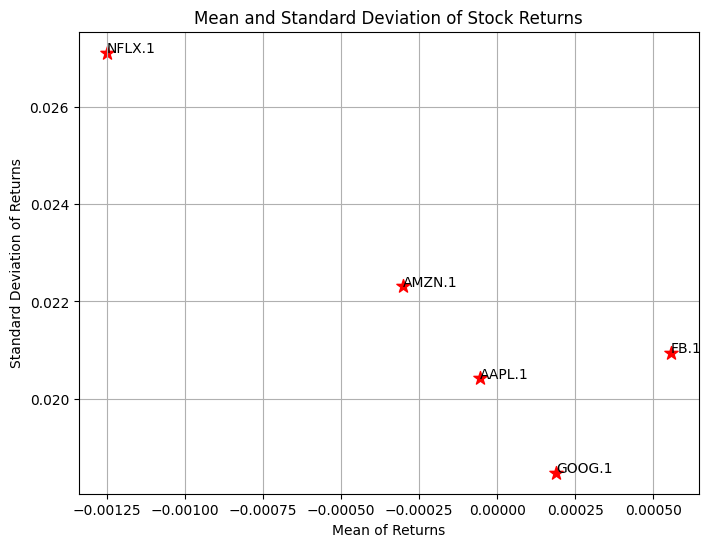

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(mean_return, std_return, marker='*', color='red', s=100)  # s controls the size of the markers

# Add labels and title
plt.xlabel('Mean of Returns')
plt.ylabel('Standard Deviation of Returns')
plt.title('Mean and Standard Deviation of Stock Returns')

# Add stock names as annotations to each point
for i, stock in enumerate(mean_return.index):
  plt.annotate(stock, (mean_return[i], std_return[i]))

plt.grid(True)
plt.show()


### (c) Randomly select weights so that each weight is non-negative and sums up to one. Print the random weight, mean, and standard deviation of the portfolio.

In [28]:
num_stocks = 5

# Generate 5 random weights
weights = np.random.rand(num_stocks)
# Normalization (Treat sum of weight as 1, then transforms all weights into a portion of the sum of weight)
weights = weights / np.sum(weights)

# Calculate portfolio mean and standard deviation
portfolio_mean = np.dot(weights, mean_return)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(selected_columns.cov(), weights)))

print("Random Weights:", weights)
print("Portfolio Mean:", portfolio_mean)
print("Portfolio Standard Deviation:", portfolio_std)


Random Weights: [0.20470262 0.25581164 0.24201828 0.01789342 0.27957404]
Portfolio Mean: -0.00016159944273764563
Portfolio Standard Deviation: 30.648462766143883


### (d) repeat c) for 1000 times, and plot the mean and stardard deviation of for these artificial portfolios using blue points in the two dimentional plane in b)

<ipython-input-33-9b413779333b>:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(stock, (mean_returns[i], std_returns[i]))


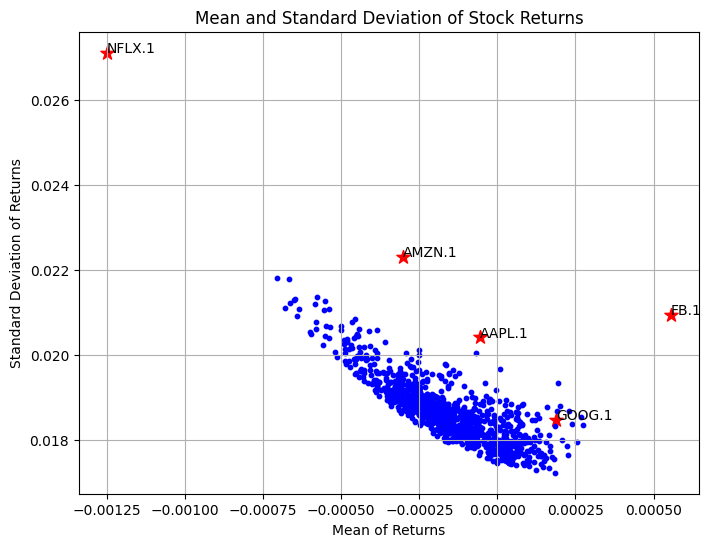

In [33]:
portfolio_means = []
portfolio_stds = []

for _ in range(1000):
  # Generate random weights
  weights = np.random.rand(num_stocks)
  weights = weights / np.sum(weights)

  # Calculate portfolio mean and standard deviation
  portfolio_mean = np.dot(weights, mean_return)
  portfolio_std = np.sqrt(np.dot(weights.T, np.dot(returns.cov(), weights)))

  portfolio_means.append(portfolio_mean)
  portfolio_stds.append(portfolio_std)


# Plot the mean and standard deviation of the portfolios
plt.figure(figsize=(8, 6))
plt.scatter(mean_return, std_return, marker='*', color='red', s=100)
plt.scatter(portfolio_means, portfolio_stds, marker='o', color='blue', s=10)

plt.xlabel('Mean of Returns')
plt.ylabel('Standard Deviation of Returns')
plt.title('Mean and Standard Deviation of Stock Returns')

for i, stock in enumerate(mean_return.index):
  plt.annotate(stock, (mean_return[i], std_return[i]))


plt.grid(True)
plt.show()


### (e) Draw the efficiency frontier in the figure of b), assuming that no short-sales are allowed

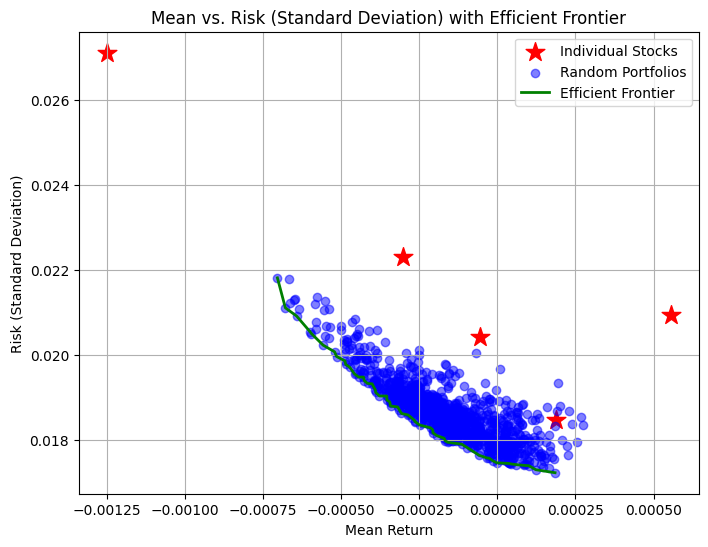

In [38]:
# Convert lists to arrays for easier processing
portfolio_means = np.array(portfolio_means)
portfolio_stds = np.array(portfolio_stds)

# Sort portfolios by mean return and find the minimum std for each unique mean return
sorted_indices = np.argsort(portfolio_means)
sorted_means = portfolio_means[sorted_indices]
sorted_stds = portfolio_stds[sorted_indices]

# Calculate the efficiency frontier by filtering portfolios with minimum std for a given mean return
efficient_frontier_means = []
efficient_frontier_stds = []

for i in range(len(sorted_means)):
    if i == 0 or sorted_stds[i] < min(efficient_frontier_stds):
        efficient_frontier_means.append(sorted_means[i])
        efficient_frontier_stds.append(sorted_stds[i])

# Plot the efficient frontier
plt.figure(figsize=(8, 6))
plt.scatter(mean_return, std_return, color='red', marker='*', s=200, label='Individual Stocks')
plt.scatter(portfolio_means, portfolio_stds, color='blue', alpha=0.5, label='Random Portfolios')
plt.plot(efficient_frontier_means, efficient_frontier_stds, color='green', linewidth=2, label='Efficient Frontier')

# Add labels and title
plt.title('Mean vs. Risk (Standard Deviation) with Efficient Frontier')
plt.xlabel('Mean Return')
plt.ylabel('Risk (Standard Deviation)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### (f) Check if the efficiency frontier in e) is the envelope line of the blue points in d)

From the plot above, we can see the the efficiency frontier in e) is the envelope line of the blue points in d)